# ACDtools issue 18 - heat map plotting function

#### Date: 12 March, 2025
##### https://github.com/Thomas-Moore-Creative/ACDtools/issues/18

Author = {"name": "Thomas Moore", "affiliation": "CSIRO", "email": "thomas.moore@csiro.au", "orcid": "0000-0003-3930-1946"}

# Install ACDtools locally

In [1]:
# this needs to be set via a custom edit per user at the moment
!pip install --user -e /g/data/es60/users/thomas_moore/code/ACDtools

Obtaining file:///g/data/es60/users/thomas_moore/code/ACDtools
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ACDtools (pyproject.toml) ... done
  Created wheel for ACDtools: filename=acdtools-0.1-0.editable-py3-none-any.whl size=3516 sha256=838943992d11b35cb44c590b806b1ccec8cc498f6ed8b94b6343bcebddff9f8c
  Stored in directory: /jobfs/136902454.gadi-pbs/pip-ephem-wheel-cache-9qbj9bth/wheels/b6/a3/f2/6ce45fbdc116ad50e421d6a11cb060cc796e867501807af446
Successfully built ACDtools
  Attempting uninstall: ACDtools
    Found existing installation: ACDtools 0.1
    Uninstalling ACDtools-0.1:
      Successfully uninstalled ACDtools-0.1


In [2]:
# Enable autoreload in the notebook
%load_ext autoreload
%autoreload 1 
%aimport ACDtools.util
%aimport ACDtools.ard
%aimport ACDtools.plot
# Importing from your local package util.py
from ACDtools import util
from ACDtools import ard
from ACDtools import plot

# Notebook settings

### filter warnings

In [3]:
import warnings
warnings.filterwarnings("ignore") # Suppress warnings

# Dask cluster from config
`client, cluster = util.start_dask_cluster_from_config('netcdf_work')`
<br>OR<br>
`client, cluster = util.start_dask_cluster_from_config('zarr_work')`

In [4]:
client, cluster = util.start_dask_cluster_from_config('netcdf_work')

Cluster started with 28 workers.
Dashboard available at: /proxy/8787/status


# Issue: build code to make heatmaps
- https://github.com/Thomas-Moore-Creative/ACDtools/issues/18

## generate dummy data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Define dimensions (e.g., 12 months and 21 years from 2000 to 2020)
n_months = 12
n_years = 21

# Create dummy heatmap data with values between -2.5 and 2.5
heatmap_data = np.random.uniform(-2.5, 2.5, size=(n_months, n_years))

# Create dummy event annotations.
# Here, we randomly annotate some cells with "LN" for the first layer
# and "EN" for the second layer (roughly 20% chance for each cell).
event_data_LN = np.where(np.random.rand(n_months, n_years) > 0.8, "LN", "")
event_data_EN = np.where(np.random.rand(n_months, n_years) > 0.8, "EN", "")

# Optional: Convert arrays to DataFrames with month and year labels for better visualization
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = list(range(2000, 2000 + n_years))

heatmap_df = pd.DataFrame(heatmap_data, index=months, columns=years)
event_data_LN_df = pd.DataFrame(event_data_LN, index=months, columns=years)
event_data_EN_df = pd.DataFrame(event_data_EN, index=months, columns=years)

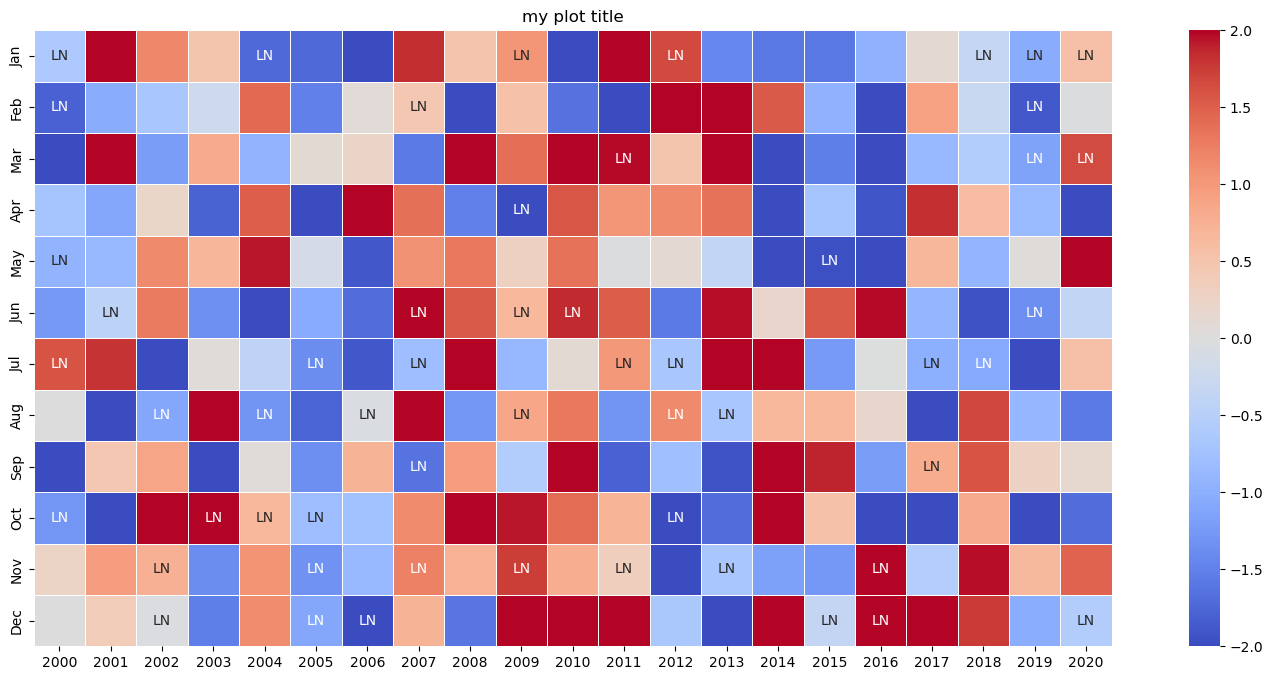

In [7]:
plot.heatmap(heatmap_df,figsize = (20,8),cmap='coolwarm',vmin=-2,vmax=2,title='my plot title',annot_data=event_data_LN_df)

# $The$  $End$